In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.metrics import v_measure_score
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
!pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

In [3]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [3]:
print(train_df.shape)
print(test_df.shape)

(87554, 188)
(21892, 188)


In [4]:
#garder uniquement 10'000 lignes de train_df
train_df=train_df.sample(10000)
print(train_df.shape)
print(test_df.shape)

(10000, 188)
(21892, 188)


# Histogramm de la répartition

c:\Users\antho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


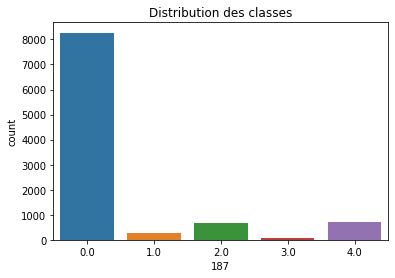

In [6]:
#montrer la distribution des classes
sns.countplot(train_df[187])
plt.title('Distribution des classes')
plt.show()

# Pre traitement

### Rééquilibrage ?

### Stockage des cibles

In [4]:
y_train=train_df[187].values
y_test=test_df[187].values

### Ajout de bruit ?

### Normalisation

In [5]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

# Scale time series
scaler = TimeSeriesScalerMeanVariance()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_2D = X_train_scaled.reshape(X_train_scaled.shape[0], -1)
X_test_scaled_2D = X_test_scaled.reshape(X_test_scaled.shape[0], -1)



X_train_r = X_train.reshape(len(X_train), X_train.shape[1])
X_test_r = X_test.reshape(len(X_test), X_test.shape[1])


TimeSeriesScalerMeanVariance prends en comptes les caractéristiques uniques des données de séries temporelles. (ce que ne fait pas un simple reshape) Ainsi, chaque série temp. contribue de manière égale à l'algorithme de regroupement

In [9]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np

def calculate_misclassification_rate(y_pred, y_true):
    n_clusters = len(set(y_pred))
    cluster_to_class = {}
    
    for cluster in range(n_clusters):
        cluster_indices = np.where(y_pred == cluster)[0]
        true_labels_in_cluster = y_true[cluster_indices]
        most_common_class = Counter(true_labels_in_cluster).most_common(1)[0][0]
        cluster_to_class[cluster] = most_common_class

    misclassified_count = 0
    for i in range(len(y_pred)):
        predicted_class = cluster_to_class[y_pred[i]]
        if predicted_class != y_true[i]:
            misclassified_count += 1

    return misclassified_count / len(y_true) * 100

# clustering hiérarchique

Misclassification rate for agglomerative clustering: 16.19312991046958


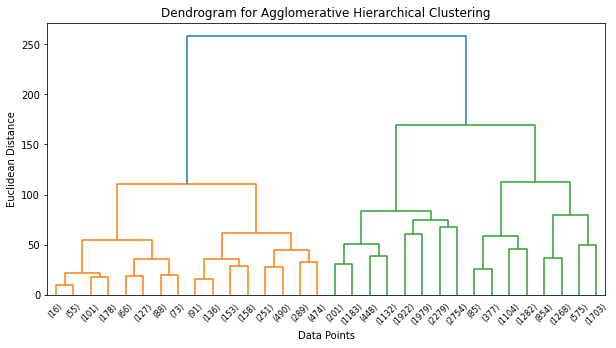

In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Prepare your data
# X_train_r and X_test_r from your previous code

# Apply agglomerative clustering
n_clusters = 5  # You can change this value to the optimal number of clusters found earlier
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
y_pred_agglo = agglomerative_clustering.fit_predict(X_test_r)

# Calculate the misclassification rate for agglomerative clustering
misclassification_rate_agglo = calculate_misclassification_rate(y_pred_agglo, y_test)
print("Misclassification rate for agglomerative clustering:", misclassification_rate_agglo)

# Plot the dendrogram
linked = linkage(X_test_r, 'ward')  # 'ward' is one of the linkage methods, you can also use 'single', 'complete', or 'average'
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=4)  # p determines the level of truncation for the dendrogram
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


Misclassification rate for agglomerative clustering: 12.214507582678603


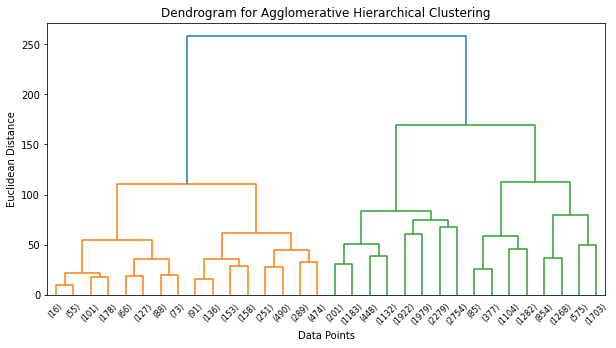

In [11]:
# Apply agglomerative clustering
n_clusters = 27  # You can change this value to the optimal number of clusters found earlier
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
y_pred_agglo = agglomerative_clustering.fit_predict(X_test_r)

# Calculate the misclassification rate for agglomerative clustering
misclassification_rate_agglo = calculate_misclassification_rate(y_pred_agglo, y_test)
print("Misclassification rate for agglomerative clustering:", misclassification_rate_agglo)

# Plot the dendrogram
linked = linkage(X_test_r, 'ward')  # 'ward' is one of the linkage methods, you can also use 'single', 'complete', or 'average'
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=4)  # p determines the level of truncation for the dendrogram
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


Misclassification rate for agglomerative clustering: 14.900420244838298


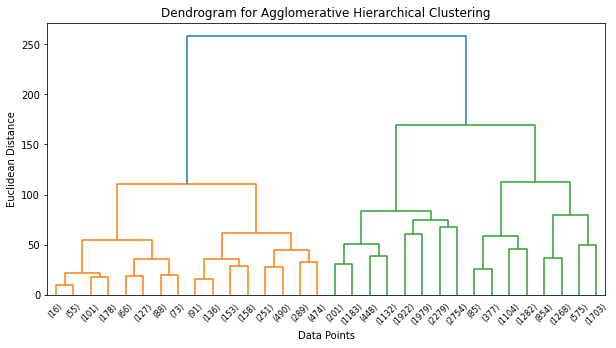

In [12]:
# Apply agglomerative clustering
n_clusters = 16  # You can change this value to the optimal number of clusters found earlier
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
y_pred_agglo = agglomerative_clustering.fit_predict(X_test_r)

# Calculate the misclassification rate for agglomerative clustering
misclassification_rate_agglo = calculate_misclassification_rate(y_pred_agglo, y_test)
print("Misclassification rate for agglomerative clustering:", misclassification_rate_agglo)

# Plot the dendrogram
linked = linkage(X_test_r, 'ward')  # 'ward' is one of the linkage methods, you can also use 'single', 'complete', or 'average'
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=4)  # p determines the level of truncation for the dendrogram
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

def find_optimal_clusters(data, min_clusters, max_clusters):
    best_silhouette_score = -1
    optimal_clusters = min_clusters

    for n_clusters in range(min_clusters, max_clusters + 1):
        # Apply agglomerative clustering
        agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
        y_pred_agglo = agglomerative_clustering.fit_predict(data)

        # Calculate the silhouette score for the current number of clusters
        silhouette_avg = silhouette_score(data, y_pred_agglo)

        print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg:.3f}")

        # Check if the silhouette score is better than the best so far
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            optimal_clusters = n_clusters

    return optimal_clusters, best_silhouette_score

# Use the function to find the optimal number of clusters
min_clusters = 2
max_clusters = 30  # You can adjust this value based on your problem
optimal_clusters, best_silhouette_score = find_optimal_clusters(X_test_r, min_clusters, max_clusters)
print(f"Optimal number of clusters: {optimal_clusters}, Best silhouette score: {best_silhouette_score:.3f}")


Number of clusters: 2, Silhouette score: 0.371
Number of clusters: 3, Silhouette score: 0.161
Number of clusters: 4, Silhouette score: 0.156
Number of clusters: 5, Silhouette score: 0.168
Number of clusters: 6, Silhouette score: 0.110
Number of clusters: 7, Silhouette score: 0.109
Number of clusters: 8, Silhouette score: 0.103
Number of clusters: 9, Silhouette score: 0.115
Number of clusters: 10, Silhouette score: 0.115
Number of clusters: 11, Silhouette score: 0.112
Number of clusters: 12, Silhouette score: 0.114


Number of clusters: 2, Silhouette score: 0.371
Number of clusters: 3, Silhouette score: 0.161
Number of clusters: 4, Silhouette score: 0.156
Number of clusters: 5, Silhouette score: 0.168
Number of clusters: 6, Silhouette score: 0.110
Number of clusters: 7, Silhouette score: 0.109
Number of clusters: 8, Silhouette score: 0.103
Number of clusters: 9, Silhouette score: 0.115
Number of clusters: 10, Silhouette score: 0.115
Number of clusters: 11, Silhouette score: 0.112
Number of clusters: 12, Silhouette score: 0.114

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

def find_optimal_clusters_misclassification(data, y_true, min_clusters, max_clusters):
    best_misclassification_rate = 100
    best_silhouette_score = -1
    optimal_clusters = min_clusters

    for n_clusters in range(min_clusters, max_clusters + 1):
        # Apply agglomerative clustering
        agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
        y_pred_agglo = agglomerative_clustering.fit_predict(data)

        # Calculate the confusion matrix for the current number of clusters
        conf_mat = confusion_matrix(y_true, y_pred_agglo)

        # Calculate the correct clustering percentage for the current number of clusters
        correct_clustering_percentage = correct_clustering_percentage(conf_mat)

        print(f"Number of clusters: {n_clusters}, Correct clustering percentage: {correct_clustering_percentage:.2f}%")

        # Check if the correct clustering percentage is better than the best so far
        if correct_clustering_percentage > best_correct_clustering_percentage:
            best_correct_clustering_percentage = correct_clustering_percentage
            optimal_clusters = n_clusters
        
        # Calculate the silhouette score for the current number of clusters
        silhouette_avg = silhouette_score(data, y_pred_agglo)

        print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg:.3f}")

        # Check if the silhouette score is better than the best so far
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            optimal_clusters = n_clusters

    return optimal_clusters, best_correct_clustering_percentage


# Use the function to find the optimal number of clusters
min_clusters = 2
max_clusters = 50  # You can adjust this value based on your problem
optimal_clusters, best_misclassification_rate = find_optimal_clusters_misclassification(X_test_r, y_test, min_clusters, max_clusters)
print(f"Optimal number of clusters: {optimal_clusters}, Best misclassification rate: {best_misclassification_rate:.2f}%")


In [13]:
def calculate_correct_clustering_percentage(conf_mat):
    # Sum the maximum values in each row (i.e., the largest cluster for each class)
    correct_clustering = np.sum(np.amax(conf_mat, axis=1))

    # Calculate the total number of samples
    total_samples = np.sum(conf_mat)

    # Calculate the correct clustering percentage
    correct_clustering_percentage = correct_clustering / total_samples * 100

    return correct_clustering_percentage


def percentage_with_diag(conf_mat):
    # Calculate the correct clustering percentage using the diagonal elements
    correct_clustering_percentage_diag = np.sum(np.diag(conf_mat)) / np.sum(conf_mat) * 100

    return correct_clustering_percentage_diag

In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

def find_optimal_clusters_misclassification(data, y_true, min_clusters, max_clusters):
    correct_clustering_percentage = 0
    best_correct_clustering_percentage = -1
    best_silhouette_score = -1
    optimal_clusters = min_clusters

    for n_clusters in range(min_clusters, max_clusters + 1):
        # Apply agglomerative clustering
        agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
        y_pred_agglo = agglomerative_clustering.fit_predict(data)

        # Calculate the confusion matrix for the current number of clusters
        conf_mat = confusion_matrix(y_true, y_pred_agglo)

        # Calculate the correct clustering percentage for the current number of clusters
        correct_clustering_percentage = calculate_correct_clustering_percentage(conf_mat)

        print(f"Number of clusters: {n_clusters}, Correct clustering percentage: {correct_clustering_percentage:.2f}%")

        # Check if the correct clustering percentage is better than the best so far
        if correct_clustering_percentage > best_correct_clustering_percentage:
            best_correct_clustering_percentage = correct_clustering_percentage
            optimal_clusters = n_clusters
        
        # Calculate the silhouette score for the current number of clusters
        silhouette_avg = silhouette_score(data, y_pred_agglo)

        print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg:.3f}")

        # Check if the silhouette score is better than the best so far
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            optimal_clusters = n_clusters

    return optimal_clusters, best_correct_clustering_percentage




# Use the function to find the optimal number of clusters
min_clusters = 2
max_clusters = 60  # You can adjust this value based on your problem
optimal_clusters, best_misclassification_rate = find_optimal_clusters_misclassification(X_test_r, y_test, min_clusters, max_clusters)
print(f"Optimal number of clusters: {optimal_clusters}, Best misclassification rate: {best_misclassification_rate:.2f}%")


Number of clusters: 2, Correct clustering percentage: 89.18%
Number of clusters: 2, Silhouette score: 0.371
Number of clusters: 3, Correct clustering percentage: 57.29%
Number of clusters: 3, Silhouette score: 0.161
Number of clusters: 4, Correct clustering percentage: 56.65%
Number of clusters: 4, Silhouette score: 0.156
Number of clusters: 5, Correct clustering percentage: 56.65%
Number of clusters: 5, Silhouette score: 0.168
Number of clusters: 6, Correct clustering percentage: 44.29%
Number of clusters: 6, Silhouette score: 0.110
Number of clusters: 7, Correct clustering percentage: 44.09%
Number of clusters: 7, Silhouette score: 0.109
Number of clusters: 8, Correct clustering percentage: 26.44%
Number of clusters: 8, Silhouette score: 0.103
Number of clusters: 9, Correct clustering percentage: 25.19%
Number of clusters: 9, Silhouette score: 0.115
Number of clusters: 10, Correct clustering percentage: 25.15%
Number of clusters: 10, Silhouette score: 0.115
Number of clusters: 11, Co

KeyboardInterrupt: 